Assignment 4 Dealing with missing Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# data filling
# Forward filling and backward filling are two data filling methods.
# The difference is the filling direction? E.g., Tuesday data (missing) equals to Monday data (existing) is forward filling. 
# The opposite is backward filling.
#  refer the below url for more on missing values:
# https://www.kaggle.com/juejuewang/handle-missing-values-in-time-series-for-beginners
# https://www.kaggle.com/dansbecker/handling-missing-values
# https://www.kaggle.com/meikegw/filling-up-missing-values

# This data filling methods are widely used in time series machine learning problems. 
# see how winner in competition use these methods to process na values. 
# https://www.kaggle.com/competitions/g-research-crypto-forecasting/discussion/323703

In [11]:
from pandas._libs.tslibs import dt64arr_to_periodarr
# read dataset from ~drive/MyDrive/Data/
dt=pd.read_csv("/content/drive/MyDrive/Data/sample_data.csv")
dt


Temparature  Humidity
0           1       1.0
1         NaN       NaN
2           3      31.0
3           2      22.0
4           3      33.0
5           1      11.0
6           2      21.0
7         NaN      24.0
8           1      12.0
9          na      32.0

In [13]:
# check to see if dataset has null value
# null values are defined as missing values or missing data in pandas
dt.isnull().sum() # sum null values in column

Temparature    2
Humidity       1
dtype: int64

In [14]:
# In order to catch all missing values in data frame, create a list of missing values
missing_values=["N/a","na",np.nan]

In [16]:
# read the dataset to mark null value as in the list "missing_values"
dt= pd.read_csv("/content/drive/MyDrive/Data/sample_data.csv",na_values=missing_values)

In [20]:
dt.isnull().sum() #check for null value
# OR
# dt.isnull().any() # This shows which column has null value - return "True"

Temparature    3
Humidity       1
dtype: int64

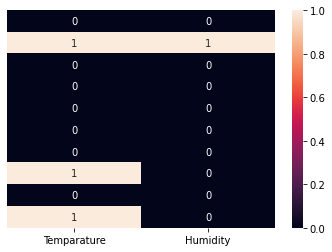

In [22]:
# To visulize the dataset ( see where the null value is) - refer to above output cell for "dt.isnull().sum() #check for null value"
sns.heatmap(dt.isnull(),yticklabels=False,annot=True)

In [ ]:
#Removing nulls


In [24]:
# drop entire row only if null is present - 3 rows will be dropped (see above original datset with 10 rows)
dt.dropna()

Temparature  Humidity
0          1.0       1.0
2          3.0      31.0
3          2.0      22.0
4          3.0      33.0
5          1.0      11.0
6          2.0      21.0
8          1.0      12.0

In [25]:
# drop only if null in all entire row (compare to heatmap out)
dt.dropna(how="all")

Temparature  Humidity
0          1.0       1.0
2          3.0      31.0
3          2.0      22.0
4          3.0      33.0
5          1.0      11.0
6          2.0      21.0
7          NaN      24.0
8          1.0      12.0
9          NaN      32.0

Data Filling

In [ ]:
# data filling
# Forward filling and backward filling are two data filling methods.
# The difference is the filling direction? E.g., Tuesday data (missing) equals to Monday data (existing) is forward filling. 
# The opposite is backward filling.
#  refer the below url for more on missing values:
# https://www.kaggle.com/juejuewang/handle-missing-values-in-time-series-for-beginners
# https://www.kaggle.com/dansbecker/handling-missing-values
# https://www.kaggle.com/meikegw/filling-up-missing-values

# This data filling methods are widely used in time series machine learning problems. 
# see how winner in competition use these methods to process na values. 
# https://www.kaggle.com/competitions/g-research-crypto-forecasting/discussion/323703

In [27]:
# Forward filling
dt.fillna(method='ffill') # see output second row filled with values from first row

Temparature  Humidity
0          1.0       1.0
1          1.0       1.0
2          3.0      31.0
3          2.0      22.0
4          3.0      33.0
5          1.0      11.0
6          2.0      21.0
7          2.0      24.0
8          1.0      12.0
9          1.0      32.0

In [28]:
# Backward filling
dt.fillna(method='bfill') # see output second row filled with values from third row

Temparature  Humidity
0          1.0       1.0
1          3.0      31.0
2          3.0      31.0
3          2.0      22.0
4          3.0      33.0
5          1.0      11.0
6          2.0      21.0
7          1.0      24.0
8          1.0      12.0
9          NaN      32.0

In [31]:
dt

Temparature  Humidity
0          1.0       1.0
1          NaN       NaN
2          3.0      31.0
3          2.0      22.0
4          3.0      33.0
5          1.0      11.0
6          2.0      21.0
7          NaN      24.0
8          1.0      12.0
9          NaN      32.0

In [32]:
# interpolation approach to replacing null value
# Interpolation is a technique in Python used to estimate unknown data points between two known data points. 
# Interpolation is mostly used to impute missing values in the dataframe or series while preprocessing data.
# Interpolation is also used in Image Processing when expanding an image you can estimate the pixel value with help of neighboring pixels.
# see:https://www.analyticsvidhya.com/blog/2021/06/power-of-interpolation-in-python-to-fill-missing-values/

dt.interpolate() # the null in row 2 (output of dt above) is replace by the mean of the value of row 1 & 3 i.e."Temperature" (1+3)/2 = 4; Humidity" (1+31)/2 = 16
# verify "Temperature" row 7  

Temparature  Humidity
0          1.0       1.0
1          2.0      16.0
2          3.0      31.0
3          2.0      22.0
4          3.0      33.0
5          1.0      11.0
6          2.0      21.0
7          1.5      24.0
8          1.0      12.0
9          1.0      32.0